### Importing the Required Libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [174]:
# Reading the data in CSV format
sales_data = pd.read_csv('superstore_final_dataset.csv', encoding='ISO-8859–1')


### Data Exploration

In [175]:
sales_data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [176]:
# info about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [177]:
# The shape of the dataset
sales_data.shape

(9800, 18)

<Axes: title={'center': 'Missing values per columns, %'}>

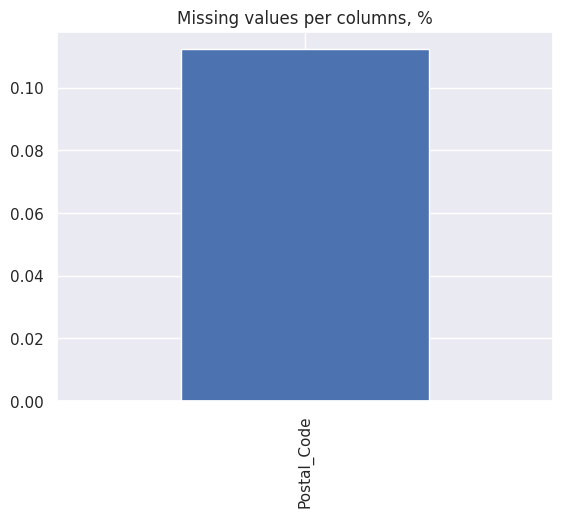

In [178]:
# finding if there are iany missing values in the dataset

missing_data = sales_data.isnull().mean() * 100

missing_data_columns = missing_data[missing_data > 0]

missing_data_columns.plot.bar(title='Missing values per columns, %')

### Data Cleaning

In [179]:
# finding null values in the data

sales_data.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

The results show that the dataset has null values in the postal code column. Although there are null values, it comes up to a sum of 11 and we can consider this insignificant. 

In [180]:
# Duplicate Data

sales_data.duplicated().sum()

0

There are no duplicated rows, so we can continue. 

### Calculated Field 

We need to create a calculated field called Profit Margin. The formula is (Profit / Sales) * 100. It produces a % answer. 

In [181]:
sales_data['Quantity'] = np.random.randint(1,6,sales_data.shape[0])


In [182]:
sales_data['Profit'] = np.random.randint(1000,size=9800)


In [183]:
sales_data['Profit Margin'] = (sales_data.Profit / sales_data.Sales) * 100
sales_data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit,Profit Margin
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,5,263,100.397007
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,5,511,69.814466
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,1,650,4445.964432
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,3,991,103.490318
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680,5,548,2449.928469


### Descriptive Statistics

In [184]:
# Getting the store's descriptive statistics

In [185]:
sales_data.describe(include='all')

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Profit,Profit Margin
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,...,9789.000000,9800,9800,9800,9800,9800,9800.000000,9800.000000,9800.000000,9800.000000
unique,NaN,4922,1230,1326,4,793,793,3,1,529,...,NaN,4,1861,3,17,1849,NaN,NaN,NaN,NaN
top,NaN,CA-2018-100111,5/9/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,34,5859,35,35,5101,9800,891,...,NaN,3140,19,5909,1492,47,NaN,NaN,NaN,NaN
mean,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059,2.995714,502.164592,2542.629567
std,2829.160653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32041.223413,NaN,NaN,NaN,NaN,NaN,626.651875,1.407915,287.495741,5525.595848
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,0.000000
25%,2450.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000,2.000000,254.000000,163.576728
50%,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,504.000000,703.691749
75%,7350.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000,4.000000,751.000000,2595.686173


## Data Analysis

Here we will answer the questions we posed at the beginning.

### Which Category is Best Selling and Most Profitable?

In [186]:
# Group sales, profit and quantity by category

category_analysis = pd.DataFrame(sales_data.groupby(['Category'])[['Sales', 'Profit', 'Quantity']].sum())
category_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,728658.5757,1032755,6245
Office Supplies,705422.3340,2980581,17649
Technology,827455.8730,907877,5464


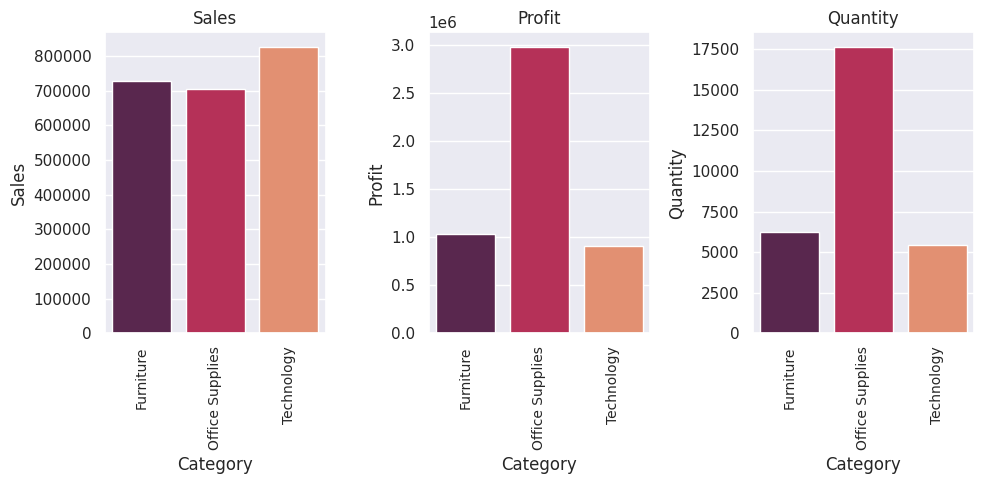

In [187]:
sns.set_theme(style='darkgrid')
figure, axis = plt.subplots(1, 3, figsize=(10, 5))

# Plotting the bars
plot1 = sns.barplot(x = category_analysis.index, y = category_analysis.Sales, ax=axis[0], palette='rocket')
plot2 = sns.barplot(x = category_analysis.index, y = category_analysis.Profit, ax=axis[1], palette='rocket')
plot3 = sns.barplot(x = category_analysis.index, y = category_analysis.Quantity, ax=axis[2], palette='rocket')

# Titles

plot1.set(title = 'Sales')
plot2.set(title = 'Profit')
plot3.set(title = 'Quantity')

# Rotating the Axes

plt.setp(plot1.get_xticklabels(), rotation= 'vertical', size = 10)
plt.setp(plot2.get_xticklabels(), rotation= 'vertical', size = 10)
plt.setp(plot3.get_xticklabels(), rotation= 'vertical', size = 10)

#Spacing
figure.tight_layout()

- All 3 categories are similar in sales.
- Technology is the best-selling, but not the most profitable. 
- Although the sales of the 3 are similar, Office Supplies is by far the most profitable. 
- Office supplies are the ones that sold the most quantity too, and this might be an indicator as to why it was the most profitable category. 

### What are the Best Selling and Most Profitable Sub-Category?

In [188]:
# Best selling catogeory 

subcategory_analysis = pd.DataFrame(sales_data.groupby(['Sub_Category'])[['Sales', 'Profit']].sum())

subcategory_sales = pd.DataFrame(subcategory_analysis.sort_values('Sales', ascending=False))

subcategory_sales

,Sales,Profit
Sub_Category,,
Phones,327782.4480,425710
Chairs,322822.7310,312364
Storage,219343.3920,424648
Tables,202810.6280,149374
Binders,200028.7850,748847
Machines,189238.6310,63376
Accessories,164186.7000,387263
Copiers,146248.0940,31528
Bookcases,113813.1987,112316


In [189]:
# Most profitable sub-category

subcategory_profit = pd.DataFrame(subcategory_analysis.sort_values('Profit', ascending=False))

subcategory_profit

,Sales,Profit
Sub_Category,,
Binders,200028.7850,748847
Paper,76828.3040,679982
Furnishings,89212.0180,458701
Phones,327782.4480,425710
Storage,219343.3920,424648
Accessories,164186.7000,387263
Art,26705.4100,384333
Chairs,322822.7310,312364
Appliances,104618.4030,235762


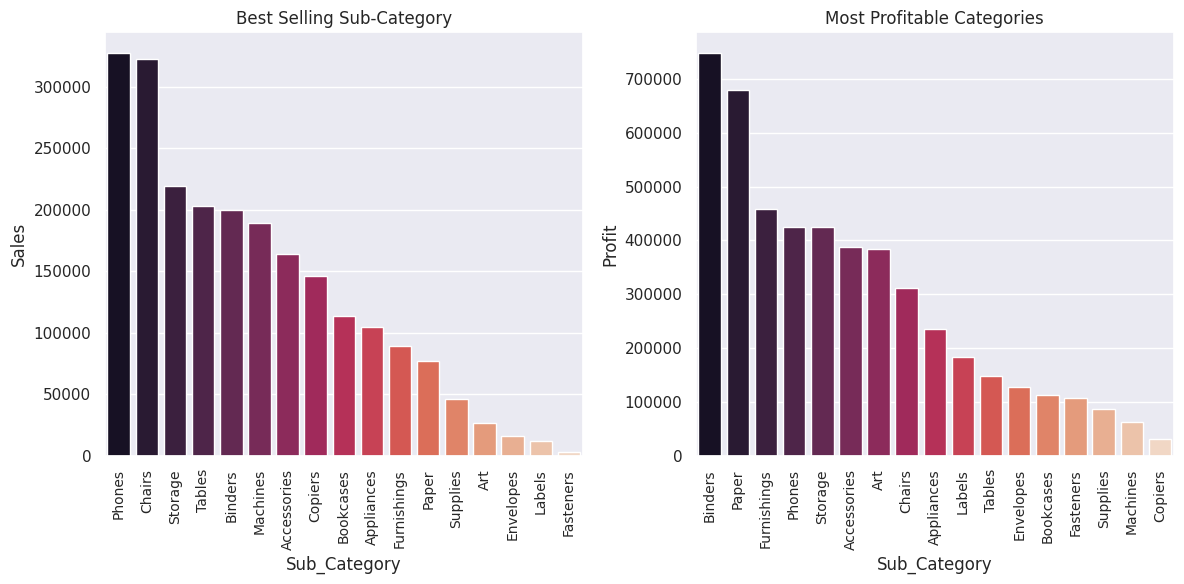

In [190]:
# Plotting the Results

sns.set_theme(style='darkgrid')

figure, axis = plt.subplots(1, 2, figsize=(12, 6))

# Plotting most sold
subcategory1 = sns.barplot(data = subcategory_sales, x= subcategory_sales.index, y=subcategory_sales.Sales, ax=axis[0], palette='rocket')
subcategory1.set(title='Best Selling Sub-Category')
subcategory1.set_xticklabels(subcategory1.get_xticklabels(), rotation = 'vertical', size=10)

# Plotting the most profitable categories
subcategory2 = sns.barplot(data = subcategory_profit, x= subcategory_profit.index, y=subcategory_profit.Profit, ax=axis[1], palette='rocket')
subcategory2.set(title='Most Profitable Categories')
subcategory2.set_xticklabels(subcategory2.get_xticklabels(), rotation = 'vertical', size=10)

figure.tight_layout()

plt.show()

- Phones and Chairs are the best-selling categories 
- Binders and Paper produce the most profit.
- Copiers, Machines, Supplies, and Bookcases are the lest profitable categories

### What is the Top Selling Sub-Category?

In [191]:
subcategory_quantity = pd.DataFrame(sales_data.groupby(['Sub_Category'])[['Quantity']].sum().sort_values('Quantity', ascending=False))
subcategory_quantity

,Quantity
Sub_Category,
Binders,4484
Paper,3997
Furnishings,2783
Phones,2645
Storage,2470
Art,2347
Accessories,2290
Chairs,1826
Appliances,1378


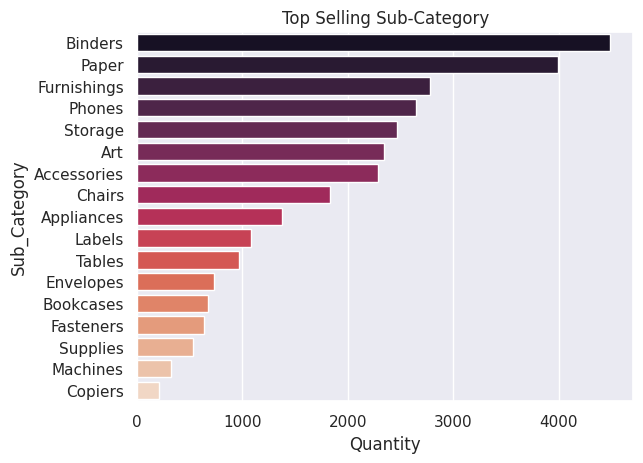

In [192]:
# Plotting the Top Selling Category

sns.set_theme(style="darkgrid")
sns.barplot(data = subcategory_quantity, y = subcategory_quantity.index, x = subcategory_quantity.Quantity, palette = "rocket")
plt.title("Top Selling Sub-Category")
plt.show()

- Binders and Paper are the most sold sub-categories
- It falls in-line with Binders and Paper being the most profitable

### Which Customer Segment is Most Profitable?

In [193]:
segment_analysis = pd.DataFrame(sales_data.groupby(['Segment'])[['Profit']].sum())
segment_analysis

,Profit
Segment,
Consumer,2548572
Corporate,1481487
Home Office,891154


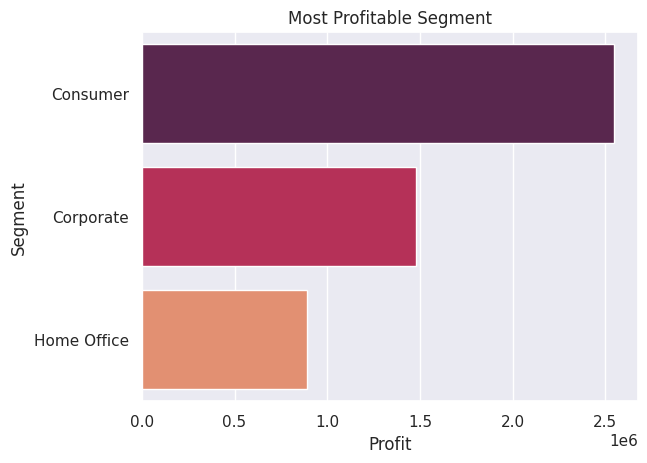

In [194]:
# Plotting the results

sns.set_theme(style="darkgrid")
sns.barplot(data = segment_analysis, y = segment_analysis.index, x = segment_analysis.Profit, palette = "rocket")
plt.title("Most Profitable Segment")
plt.show()

- The consumer segment is the msot profitable, followed by the Corporate, and finally the Home Office segment.

### Which is the Preffered Ship Mode?

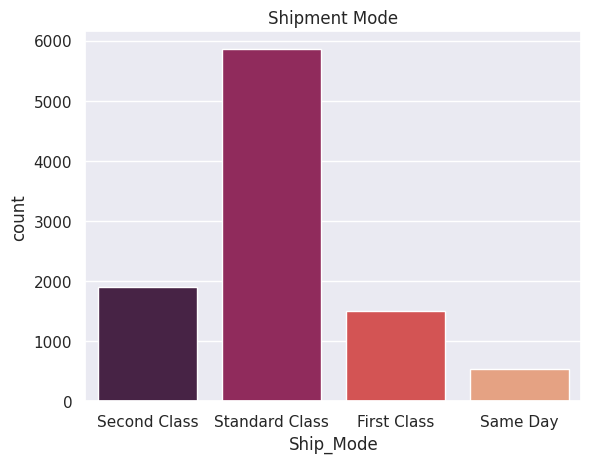

In [195]:
# Plotting the shipment mode

sns.set_theme(style='darkgrid')
sns.countplot(x=sales_data['Ship_Mode'], palette='rocket')
plt.title('Shipment Mode')
plt.show()

- The preffered shipping method is in the Standard Class, and shows us that msot customers want the normal shipping method as it is often the cheapest and doesn't take too long. 

### Which Region is the Most Profitable?

In [196]:
region_analysis = pd.DataFrame(sales_data.groupby(['Region'])['Profit'].sum())
region_analysis

,Profit
Region,
Central,1153697
East,1408492
South,809994
West,1549030


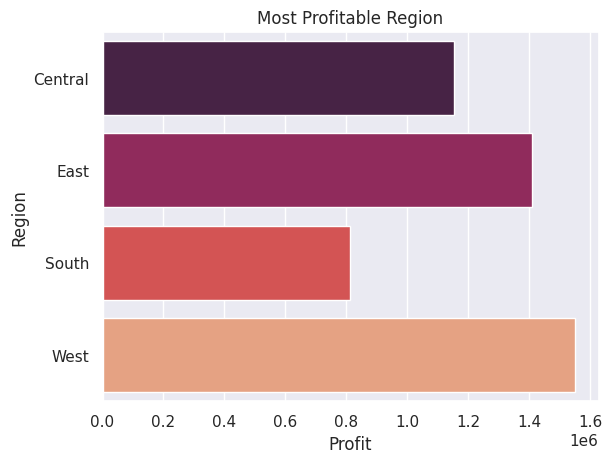

In [197]:
#Plotting a Pie Chart
sns.set_theme(style="darkgrid")
sns.barplot(data = region_analysis, y = region_analysis.index, x = region_analysis.Profit, palette = "rocket")
plt.title("Most Profitable Region")
plt.show()

- West seems to be the most profitable region. 

### Which City had the Highest and Lowest Number of Sales?

In [198]:
city_sales = pd.DataFrame(sales_data.groupby(['City'])[['Sales', 'Quantity']].sum().sort_values('Sales', ascending=False))



In [199]:
# Top 10 cities 
top10 = city_sales[:10]
top10

,Sales,Quantity
City,,
New York City,252462.5470,2628
Los Angeles,173420.1810,2136
Seattle,116106.3220,1275
San Francisco,109041.1200,1513
Philadelphia,108841.7490,1606
Houston,63956.1428,1137
Chicago,47820.1330,908
San Diego,47521.0290,485
Jacksonville,44713.1830,376


In [200]:
# Bottom 10 Cities
bottom10 = city_sales[-10:]
bottom10

,Sales,Quantity
City,,
Missouri City,6.370,1
Keller,6.000,5
Layton,4.960,3
Springdale,4.300,3
San Luis Obispo,3.620,3
Ormond Beach,2.808,4
Pensacola,2.214,3
Jupiter,2.064,2
Elyria,1.824,4


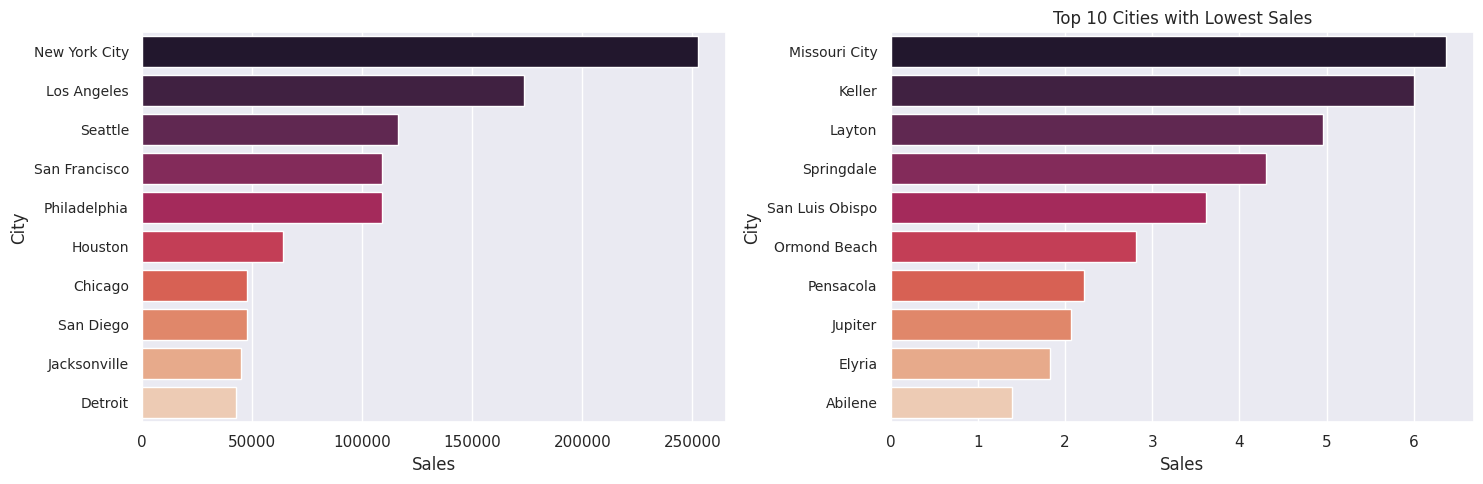

In [201]:
# Plotting top 10 and bottom 10 cities 

figure, axis = plt.subplots(1, 2, figsize=(15,5))
sns.set_theme(style='darkgrid')

# top 10 plot

top10plot = sns.barplot(data= top10, y=top10.index, x=top10.Sales, palette='rocket', ax=axis[0])
plt.title('Top 10 Cities with Highest Sales')
top10plot.set_yticklabels(top10plot.get_yticklabels(), size=10)

# bottom 10 plot

bottom10plot = sns.barplot(data= bottom10, y=bottom10.index, x=bottom10.Sales, palette='rocket', ax=axis[1])
plt.title('Top 10 Cities with Lowest Sales')
bottom10plot.set_yticklabels(bottom10plot.get_yticklabels(), size=10)

figure.tight_layout()

plt.show()

The company should target the top 10 cities in sales there is an enormous disparity between the top 10 and the bottom 10 in the number of sales.

### Recommendations

#### The Questions

- Which Category is Best Selling and Most Profitable?
- What are the Best Selling and Most Profitable Sub-Category?
- What is the Top Selling Sub-Category?
- Which Customer Segment is Most Profitable?
- Which is the Preferred Ship Mode?
- Which Region is the Most Profitable?
- Which City has the Highest and Lowest Number of Sales?

#### Recommendations 

- The company's main focus should be on the Office Supplies sub-category with Bidners and Paper being the highest selling and msot profitable. 
- Selling Copiers and Machines will yield us the least amount of profit. On the other hand, they may be able to bundle paper with copiers as paper seems to be the msot profitabel category. 
- Another thing we can conclude is that there should be deals on selling binders and paper as they go together and are the msot profitable by far. 
- Consumers make up the largest segment of the customer base and should be the ones we target the most. 
- The main focus should be on the top 10 cities with the highest sales with our marketing. 
- For categories with the lowest sales, we should focus on discounts and bundling to be able to sell them. 